In [428]:
import pandas as pd
import plotly
import plotly.express as px

df = pd.read_csv("/home/khll/module/templot_clean/templot/data/df.csv")



df = pd.melt(df,id_vars=['Identifiant','Nom_Etablissement_x', 'LLX', 'LLY','Regions'], var_name='Annee', value_name='Quantite')
df=df[df.Quantite!=0]

df['Annee'] = df['Annee'].apply(lambda x: x[-4:])

df_agr = df.groupby(["Regions", "Annee"])["Quantite"].mean().reset_index()

#df_agr['AnneeStr'] = df_agr['Annee'].apply(lambda x: f'{str(x)}')


#fig = px.scatter_polar(df_agr, r="Quantite", theta="Regions", animation_frame="Annee")


fig = px.bar_polar(df_agr, r="Quantite", theta="Regions", color="Regions", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma[-2::-1],animation_frame="Annee")
fig.update_layout(showlegend=False)
fig.show()


In [426]:
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd

df = pd.read_csv("/home/khll/module/templot_clean/templot/data/df.csv")



df = pd.melt(df,id_vars=['Identifiant','Nom_Etablissement_x', 'LLX', 'LLY','Regions'], var_name='Annee', value_name='Quantite')

df['Annee'] = df['Annee'].apply(lambda x: x[-4:])

df_agr = df.groupby(["Regions", "Annee"])["Quantite"].median().reset_index()


,Regions,Annee,Quantite
0,Auvergne-Rhône-Alpes,2003,154.8850
1,Auvergne-Rhône-Alpes,2004,149.3440
2,Auvergne-Rhône-Alpes,2005,144.9495
3,Auvergne-Rhône-Alpes,2006,134.0000
4,Auvergne-Rhône-Alpes,2007,133.0000
...,...,...,...
190,Île-de-France,2013,69.5290
191,Île-de-France,2014,69.3000
192,Île-de-France,2015,58.3000
193,Île-de-France,2016,58.2600


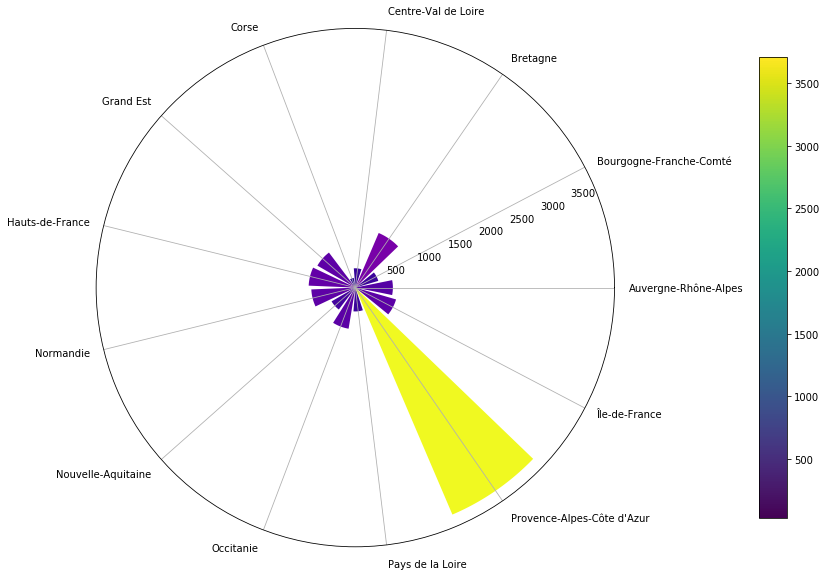

In [414]:


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)

sample = df_agr[df_agr.Annee=="2017"]["Quantite"]

N = len(sample) 
theta = np.arange(0, 2*np.pi, 2*np.pi/N) 

viridis = plt.cm.get_cmap('plasma')
c = viridis((data-data.min())/(data.max()-data.min()))


ax.set_xticks(theta)
ax.set_xticklabels(df_agr[df_agr.Annee=="2017"]["Regions"])
ax.yaxis.grid(False)

data = df_agr["Quantite"]



bars = ax.bar(theta, sample, width=0.4,color=c[df_agr.Annee=="2017"])



import matplotlib as mpl
vmin,vmax = data.min(), data.max()
cNorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
ax3 = fig.add_axes([1.15, 0.1, 0.05, 0.8])


cb1 = mpl.colorbar.ColorbarBase(ax3, norm=cNorm)


for th, label in zip(ax.get_xticks(), ax.get_xticklabels()):
    th = th * ax.get_theta_direction() + ax.get_theta_offset()
    th = np.pi/2 - th
    y, x = np.cos(th), np.sin(th)
    if x >= 0.1:
        label.set_horizontalalignment('left')
    if x <= -0.1:
        label.set_horizontalalignment('right')
    if y >= 0.5:
        label.set_verticalalignment('bottom')
    if y <= -0.5:
        label.set_verticalalignment('top')
        
fig.subplots_adjust(left=0, bottom=0, right=0.9, top=1, wspace=None, hspace=None)

